In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("NEW Candidates Cleaned.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,geo_name,year,votes,vote_share,incumbent,winner,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count,cpi_prevYear,unemployment_prevYear,pid_est_knn,gender_est_knn,race_est_knn
0,3244,Abilene,1996,3826.0,0.89,1.0,1,0.050000,0.950000,Republican,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,1.020000,0.502459,0.798016,0.080899,0.178764,0.101590,2,152.383333,5.6,1.000000,1.0,2.0
1,4719,Abilene,1996,451.0,0.11,0.0,0,0.573265,0.426735,Unknown,1.0,0.0,Male,0.03,0.97,0.0,0.0,0.0,Caucasian,-0.145909,0.502459,0.798016,0.080899,0.178764,0.101590,2,152.383333,5.6,0.417135,1.0,2.0
2,530,Akron,2003,26967.0,0.71,1.0,1,1.000000,0.000000,Democrat,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,-0.850000,0.520664,0.657211,0.293766,0.014515,0.022447,2,179.866667,5.8,0.000000,1.0,2.0
3,1480,Akron,2003,11171.0,0.29,0.0,0,0.000000,1.000000,Republican,1.0,0.0,Male,0.58,0.41,0.0,0.0,0.0,Black,0.550000,0.520664,0.657211,0.293766,0.014515,0.022447,2,179.866667,5.8,1.000000,1.0,1.0
4,419,Akron,2011,31674.0,0.70,1.0,1,1.000000,0.000000,Democrat,1.0,0.0,Male,0.00,1.00,0.0,0.0,0.0,Caucasian,-0.362011,0.517043,0.619837,0.313499,0.022048,0.030919,2,218.076167,9.6,0.000000,1.0,2.0


In [3]:
categorical_features = ["pid_est", "gender_est", "race_est"]
numeric_features = ["year", "incumbent", "candidate_count"]
selected_features = categorical_features + numeric_features

X = df[selected_features]
Y = df["winner"]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
ohe = OneHotEncoder()
std = StandardScaler()

ct = make_column_transformer(
    (ohe, categorical_features),
    (std, numeric_features),
    remainder = 'passthrough'
)

model = DecisionTreeClassifier()

pipeline = make_pipeline(ct, model)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['pid_est', 'gender_est',
                                                   'race_est']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'incumbent',
                                                   'candidate_count'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [6]:
Y_pred = pipeline.predict(X_test)

In [7]:
print("\nTest Set Evaluation:")
print(classification_report(Y_test, Y_pred))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       681
           1       0.71      0.71      0.71       367

    accuracy                           0.79      1048
   macro avg       0.77      0.77      0.77      1048
weighted avg       0.79      0.79      0.79      1048



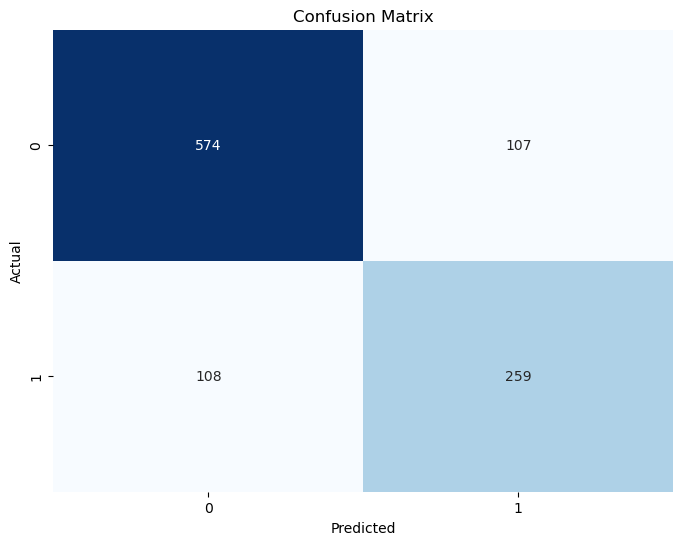

In [8]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

In [9]:
roc_auc = roc_auc_score(Y_test, Y_pred)
roc_auc

0.7743000956279235

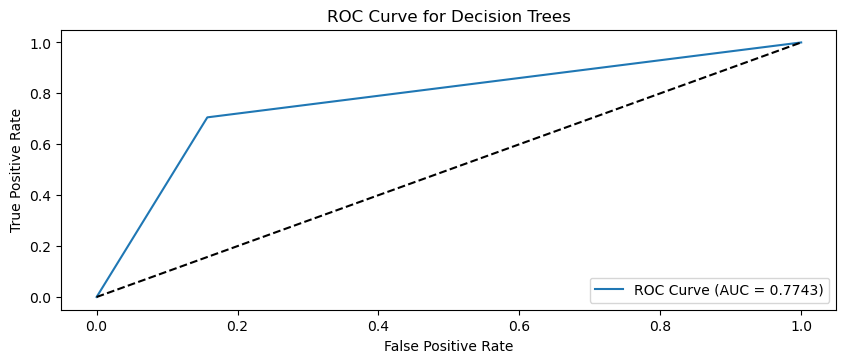

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')